In [1]:
import tensorflow
tensorflow.__version__

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'1.4.0'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(y_train.shape[0])  #y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

In [8]:
y_train.shape

(50000,)

In [9]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 50
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

In [11]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
# Convert the labels to categories
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train.shape

(50000, 10)

In [14]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [15]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [16]:
%%time
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_split=0.1,
          shuffle=True,
          verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 23s - loss: 1.5512 - acc: 0.4295 - val_loss: 1.1680 - val_acc: 0.5832
Epoch 2/50
 - 22s - loss: 1.1565 - acc: 0.5867 - val_loss: 1.0286 - val_acc: 0.6386
Epoch 3/50
 - 22s - loss: 0.9942 - acc: 0.6449 - val_loss: 0.9653 - val_acc: 0.6628
Epoch 4/50
 - 22s - loss: 0.8943 - acc: 0.6843 - val_loss: 0.8045 - val_acc: 0.7300
Epoch 5/50
 - 22s - loss: 0.8293 - acc: 0.7091 - val_loss: 0.7549 - val_acc: 0.7408
Epoch 6/50
 - 22s - loss: 0.7683 - acc: 0.7280 - val_loss: 0.7515 - val_acc: 0.7484
Epoch 7/50
 - 22s - loss: 0.7187 - acc: 0.7483 - val_loss: 0.6739 - val_acc: 0.7672
Epoch 8/50
 - 22s - loss: 0.6833 - acc: 0.7590 - val_loss: 0.6955 - val_acc: 0.7662
Epoch 9/50
 - 22s - loss: 0.6445 - acc: 0.7720 - val_loss: 0.6763 - val_acc: 0.7728
Epoch 10/50
 - 22s - loss: 0.6190 - acc: 0.7810 - val_loss: 0.6545 - val_acc: 0.7810
Epoch 11/50
 - 22s - loss: 0.5891 - acc: 0.7913 - val_loss: 0.6444 - val_acc: 0.7886
Epoch 12/50
 - 22s - loss

In [17]:
model_json = model.to_json()
open('cifar10_architecture2_adam.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights2_adam.h5')

In [18]:
%%time
scores = model.evaluate(X_test, y_test, verbose=2)
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 78.66%
CPU times: user 1.17 s, sys: 84 ms, total: 1.25 s
Wall time: 1.45 s


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


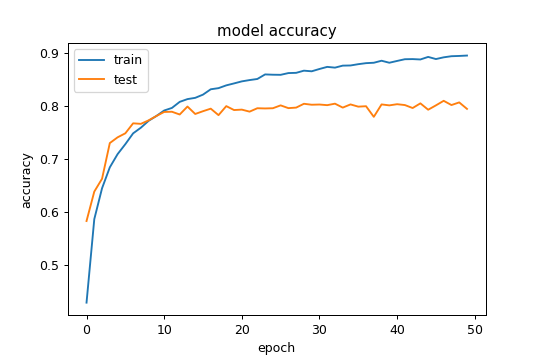

In [23]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


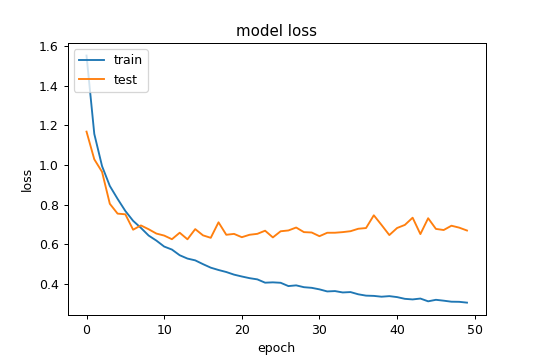

In [24]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[799,   8,  32,  14,  12,   7,  13,   7,  81,  27],
       [ 12, 885,   2,   5,   2,   3,   4,   2,  21,  64],
       [ 50,   0, 665,  56,  76,  53,  64,   9,  17,  10],
       [ 22,  10,  37, 623,  50, 140,  72,  19,  18,   9],
       [ 16,   2,  47,  48, 782,  24,  34,  31,  10,   6],
       [  8,   0,  26, 188,  40, 687,  24,  13,   8,   6],
       [  9,   4,  16,  50,  22,   9, 878,   1,   7,   4],
       [ 12,   2,  14,  46,  55,  54,   8, 799,   2,   8],
       [ 41,  24,   6,  13,   8,   2,   7,   1, 886,  12],
       [ 20,  56,   2,  18,   3,   7,   6,   2,  24, 862]])

<IPython.core.display.Javascript object>


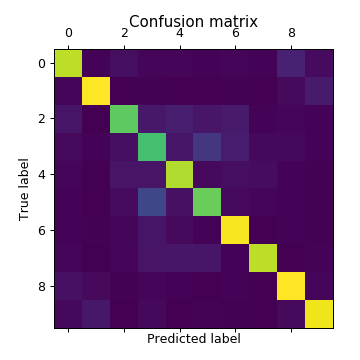

In [29]:
# Show confusion matrix in a separate window
plt.matshow(conf_mx,cmap=plt.cm.viridis)
plt.title('Confusion matrix')
#plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()